Author: Santiago Matallana

Project: Presidential speeches

Created: 2016-03-13

Purpose: Analyze speeches

In [1]:
# Requirements

import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
import re
import string

In [2]:
speeches = pd.read_pickle('speeches.pkl')
speeches

,Year,Month,Day,Title,Location,URL,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,8,7,Discurso del Presidente Juan Manuel Santos Cal...,N.A.,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,).- El siguiente es el discurso del presidente...,2010-08-07,el siguiente es el discurso del presidente ju...,"[el, siguiente, es, el, discurso, del, preside...","[siguiente, discurso, presidente, juan, manuel...","(siguiente, discurso, presidente, juan, manuel..."
1,2010,8,8,Palabras del Presidente Santos durante la reun...,N.A.,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"“Quise venir de primero aquí a Guaranda, para ...",2010-08-08,quise venir de primero aquí a guaranda para da...,"[quise, venir, de, primero, aquí, a, guaranda,...","[quise, venir, primero, aquí, guaranda, darle,...","(quise, venir, primero, aquí, guaranda, darle,..."
2,2010,8,11,"Palabras del Presidente de la República, Juan ...",N.A.,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"'Cuida tus pensamientos, porque se convertirán...",2010-08-11,cuida tus pensamientos porque se convertirán e...,"[cuida, tus, pensamientos, porque, se, convert...","[cuida, pensamientos, convertirán, palabras, c...","(cuida, pensamientos, convertirán, palabras, c..."
3,2010,8,13,Palabras del Presidente Juan Manuel Santos Cal...,Horario de atención: lunes a vierne,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,,2010-08-13,,[],[],()
4,2010,8,13,Palabras del Presidente Juan Manuel Santos en ...,"Popayán, Cauca",http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"“Hoy es un día muy, muy importante. Para mí, p...",2010-08-13,hoy es un día muy muy importante para mí para ...,"[hoy, es, un, día, muy, muy, importante, para,...","[hoy, día, importante, gobierno, departamento,...","(hoy, día, importante, gobierno, departamento,..."
5,2010,8,14,Palabras del Presidente Juan Manuel Santos en ...,Bucaramanga,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Muy buenos días a todos. Qué bueno estar aquí...,2010-08-14,muy buenos días a todos qué bueno estar aquí e...,"[muy, buenos, días, a, todos, qué, bueno, esta...","[buenos, días, bueno, aquí, bucaramanga, santa...","(buenos, días, bueno, aquí, bucaramanga, santa..."
6,2010,8,18,Palabras del Presidente Juan Manuel Santos en ...,Bogotá,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Yo tampoco –no se preocupen– voy a echar ning...,2010-08-18,yo tampoco no se preocupen voy a echar ningún ...,"[yo, tampoco, no, se, preocupen, voy, a, echar...","[tampoco, preocupen, voy, echar, ningún, discu...","(tampoco, preocupen, voy, echar, ningún, discu..."
7,2010,8,18,Palabras del Presidente Juan Manuel Santos en ...,San André,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Nuestros corazones están con ustedes; el nues...,2010-08-18,nuestros corazones están con ustedes el nuestr...,"[nuestros, corazones, están, con, ustedes, el,...","[corazones, ustedes, colombianos, pésame, titu...","(corazones, ustedes, colombianos, pésame, titu..."
8,2010,8,19,"Palabras del Presidente de la República, Docto...",Bogotá,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Antes de comenzar quisiera hacer una breve de...,2010-08-19,antes de comenzar quisiera hacer una breve dec...,"[antes, de, comenzar, quisiera, hacer, una, br...","[comenzar, quisiera, hacer, breve, declaración...","(comenzar, quisiera, hacer, breve, declaración..."
9,2010,8,20,"Palabras del Presidente de la República, Docto...",Barranquilla,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"“¡Qué bueno venir a la costa Caribe, a esta qu...",2010-08-20,qué bueno venir a la costa caribe a esta queri...,"[qué, bueno, venir, a, la, costa, caribe, a, e...","[bueno, venir, costa, caribe, querida, barranq...","(bueno, venir, costa, caribe, querida, barranq..."


## Number of available speeches.

In [3]:
len(speeches)

2656

## Number of days in office.

In [4]:
speeches['Date'][2650] - speeches['Date'][0]

Timedelta('2041 days 00:00:00')

## Number of days in which at least one speech was given.

In [5]:
len(speeches.Date.unique())

1442

## Maximum number of speeches in a day.

In [6]:
speeches['Date'].value_counts()

2013-11-21    7
2012-09-18    6
2015-09-09    5
2012-11-14    5
2015-05-08    5
2012-04-19    5
2011-12-06    5
2015-11-12    5
2014-04-29    5
2015-11-04    5
2012-06-13    5
2014-08-26    5
2013-02-25    5
2015-02-06    5
2015-12-03    5
2013-12-12    5
2013-04-09    4
2016-02-11    4
2014-11-12    4
2016-03-01    4
2012-12-20    4
2013-04-23    4
2012-12-07    4
2015-03-25    4
2014-08-14    4
2012-11-28    4
2013-11-18    4
2012-07-12    4
2012-06-27    4
2013-09-12    4
             ..
2012-05-03    1
2011-11-28    1
2011-01-26    1
2015-08-21    1
2015-01-07    1
2013-09-22    1
2012-07-19    1
2010-12-11    1
2011-08-16    1
2012-04-20    1
2013-08-01    1
2012-12-24    1
2013-08-29    1
2012-01-21    1
2010-11-30    1
2016-02-21    1
2012-12-13    1
2011-12-30    1
2010-09-01    1
2015-11-30    1
2011-05-07    1
2014-01-11    1
2013-03-02    1
2015-05-11    1
2016-02-17    1
2014-07-11    1
2011-02-06    1
2010-08-21    1
2015-11-19    1
2015-03-26    1
Name: Date, dtype: int64

In [7]:
# Inspect to be sure

list(speeches[speeches['Date'] == '2013-11-21']['Title'])

['Palabras del Presidente Juan Manuel Santos en el Balance Social para la Prosperidad en Pereira',
 'Palabras del Presidente Juan Manuel Santos en la ceremonia de posesión del Embajador ante la República Argentina y del Alto Consejero Presidencial para la Competitividad y Proyectos Estratégicos',
 'Palabras del Presidente Juan Manuel Santos en la celebración del 53 Banquete del Millón',
 'Palabras del Presidente Juan Manuel Santos en la clausura del Congreso de la Cámara de Internacional de Empresas y Emprendedores Cristianos',
 'Palabras del Presidente Juan Manuel Santos en el almuerzo ofrecido a los Reyes de Holanda durante su visita a Colombia',
 'Remarks by the President Juan Manuel Santos at the lunch offered to His and Her Majesty, the King and Queen of the Netherlands during their visit to Colombia',
 'Palabras del Presidente de la República, Juan Manuel Santos, en el 10º Congreso Nacional de la Infraestructura']

#### So, one duplicate (translation). Maximum in a day: 6

## Histogram of number of speeches per day.

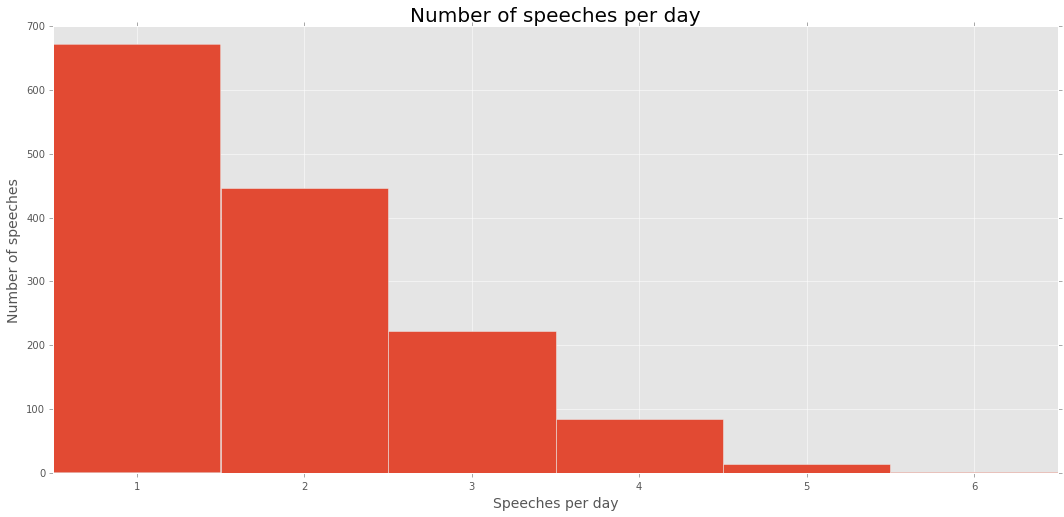

In [395]:
by_date = speeches['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 6.5)
plt.title("Number of speeches per day", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Speeches per day", fontdict={'fontsize': 14});
plt.savefig('images/hist_daily.png')

## Plot of number of speeches per day of the week.

In [9]:
# Get day of the week with datetime method
speeches['Day'] = speeches['Date'].dt.dayofweek

# Create dictionary to label categorical variable produced by 'dayofweek' method
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# For each value in 'Weekday', apply function that labels with corresponding name of the weekday
speeches['Day'] = speeches['Day'].apply(lambda x: days[x])

In [10]:
# Order levels of factor variable

speeches['Day'] = \
    pd.Categorical(speeches['Day'], ['Monday','Tuesday','Wedsnesday','Thursday','Friday','Saturday','Sunday'])

In [11]:
# Get count by weekday

by_weekday = speeches['Day'].value_counts().sortlevel()
by_weekday

Monday        346
Tuesday       469
Wedsnesday    514
Thursday      478
Friday        466
Saturday      282
Sunday        101
dtype: int64

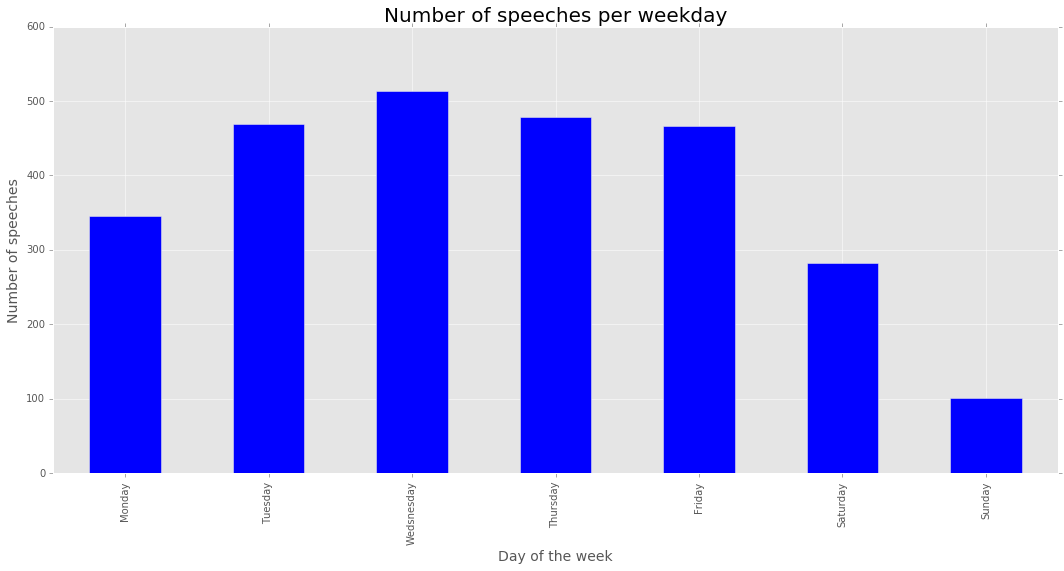

In [12]:
# Plot of number of speeches per day of the week

by_weekday.plot.bar()
plt.title("Number of speeches per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});
plt.savefig('images/bar_weekday.png')

## Plot of number of speeches per month.

In [13]:
# Get count by month

by_month = speeches['Month'].value_counts().sort_index()
by_month

1     173
2     241
3     217
4     173
5     207
6     226
7     221
8     237
9     236
10    260
11    270
12    195
Name: Month, dtype: int64

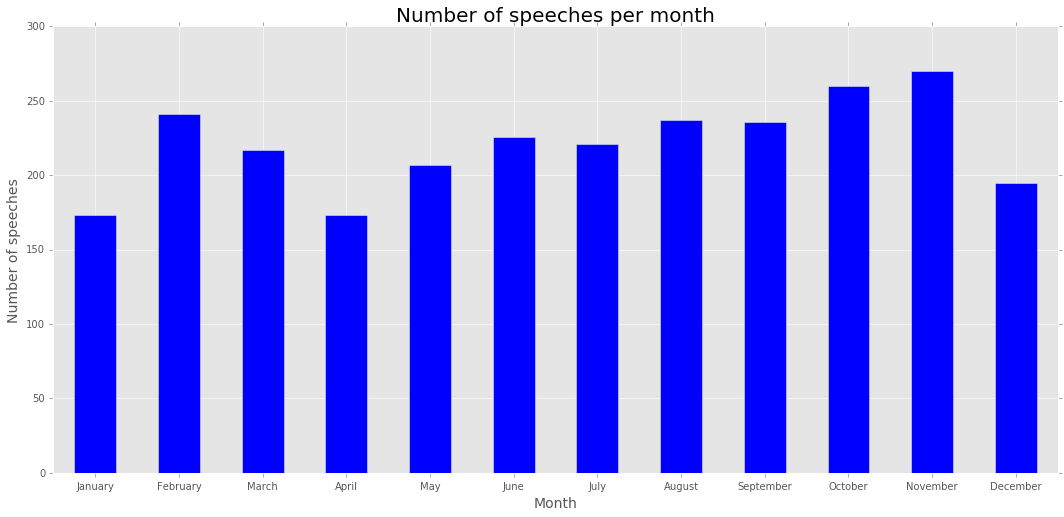

In [14]:
by_month.plot.bar()
plt.title("Number of speeches per month", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='horizontal');
plt.savefig('images/bar_month.png')

## Plot of number of speeches per year.

In [15]:
# Get count by year

by_year = speeches['Year'].value_counts().sort_index()
by_year

2010    137
2011    408
2012    507
2013    577
2014    431
2015    506
2016     90
Name: Year, dtype: int64

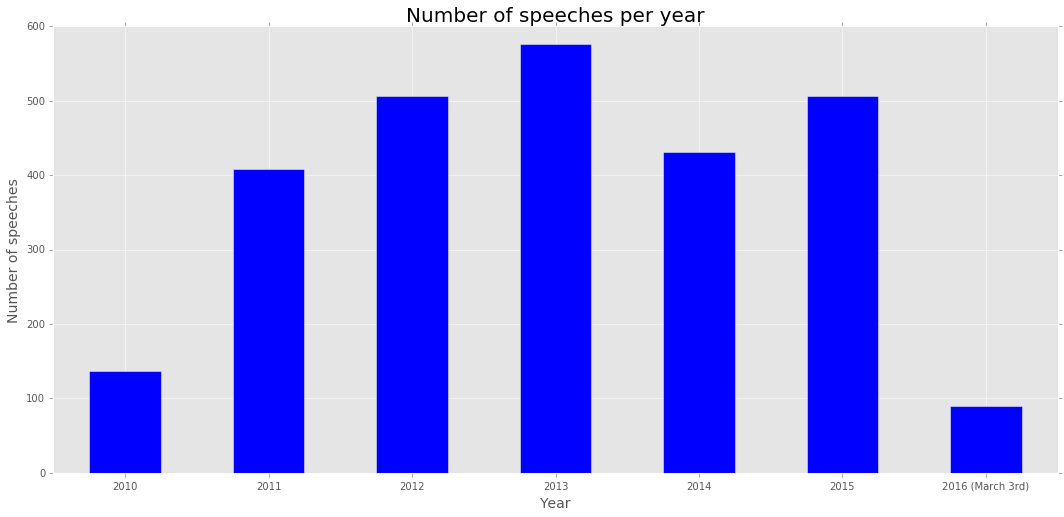

In [16]:
by_year.plot.bar()
plt.title("Number of speeches per year", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Year", fontdict={'fontsize': 14})
labels = ['2010','2011','2012','2013','2014','2015','2016 (March 3rd)']
plt.xticks(range(7), labels, rotation='horizontal');
plt.savefig('images/bar_year.png')

## Plot of number of speeches per month (all period).

In [17]:
# Group by month

by_year_month = pd.groupby(speeches, by=[speeches['Date'].dt.year, speeches['Date'].dt.month])

In [211]:
month_labels = ['2010-8','2010-9','2010-10','2010-11','2010-12',\
          '2011-1','2011-2','2011-3','2011-4','2011-5','2011-6','2011-7','2011-8','2011-9','2011-10','2011-11','2011-12',\
          '2012-1','2012-2','2012-3','2012-4','2012-5','2012-6','2012-7','2012-8','2012-9','2012-10','2012-11','2012-12',\
          '2013-1','2013-2','2013-3','2013-4','2013-5','2013-6','2013-7','2013-8','2013-9','2013-10','2013-11','2013-12',\
          '2014-1','2014-2','2014-3','2014-4','2014-5','2014-6','2014-7','2014-8','2014-9','2014-10','2014-11','2014-12',\
          '2015-1','2015-2','2015-3','2015-4','2015-5','2015-6','2015-7','2015-8','2015-9','2015-10','2015-11','2015-12',\
          '2016-1','2016-2','2016-3']

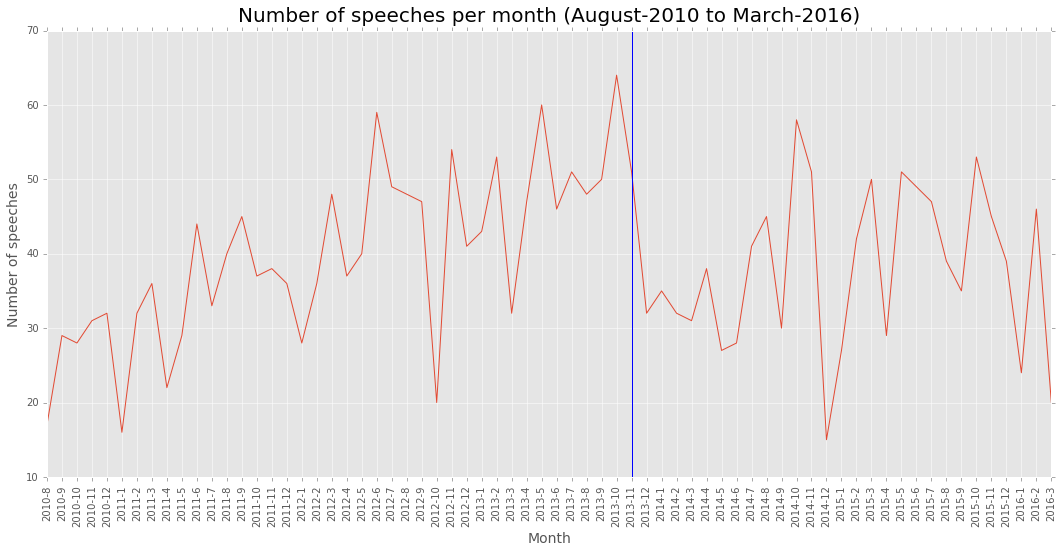

In [226]:
by_month = by_year_month['Month'].agg('count')
by_month.plot()
plt.title("Number of speeches per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.axvline(x=39, linewidth=1, color='b');
plt.savefig('images/line_month.png')

## Word cloud.

In [19]:
# Concatenate all speeches in one string

all_speeches = speeches.Speech.str.cat(sep=',')

In [20]:
# Add additional relevant found characters to strip punctuation

punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [21]:
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [22]:
# Strip punctuation from string

all_speeches = no_punct(all_speeches)

In [23]:
# Lowercase

all_speeches = all_speeches.lower()

In [24]:
len(all_speeches)

29636587

In [30]:
# Tokenize text

all_tokens = word_tokenize(all_speeches)

In [27]:
# Eliminate stopwords in Spanish

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [28]:
# Grab stopwords in Spanish

stopwords_esp = stopwords.words('spanish')

In [31]:
# Drop stopwords

all_tokens = no_stopwords(all_tokens)

In [32]:
len(all_tokens)

2443485

In [99]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(all_tokens).most_common()

[('país', 20494),
 ('colombia', 14727),
 ('aquí', 13446),
 ('vamos', 12588),
 ('va', 12366),
 ('hoy', 12049),
 ('importante', 11643),
 ('ustedes', 11519),
 ('gobierno', 10583),
 ('años', 10397),
 ('si', 10046),
 ('hacer', 9861),
 ('ser', 9030),
 ('paz', 9005),
 ('año', 8421),
 ('gran', 8250),
 ('colombianos', 8176),
 ('mil', 7686),
 ('bien', 7504),
 ('hace', 7480),
 ('mundo', 7287),
 ('ahí', 7258),
 ('presidente', 7215),
 ('vez', 7084),
 ('cómo', 6921),
 ('muchas', 6788),
 ('cada', 6548),
 ('tener', 6511),
 ('sido', 6341),
 ('forma', 6321),
 ('mejor', 6299),
 ('ciento', 5848),
 ('gracias', 5842),
 ('van', 5818),
 ('millones', 5648),
 ('parte', 5640),
 ('dos', 5549),
 ('haciendo', 5548),
 ('usted', 5493),
 ('seguridad', 5410),
 ('así', 5321),
 ('quiero', 5294),
 ('tan', 5169),
 ('países', 5127),
 ('decir', 5117),
 ('proceso', 5048),
 ('ejemplo', 5017),
 ('toda', 5010),
 ('educación', 4879),
 ('nacional', 4861),
 ('podemos', 4847),
 ('sino', 4840),
 ('día', 4722),
 ('ver', 4720),
 ('pode

In [100]:
# From inspection of frequency distribution, make list of words of interest

of_interest = ['paz','seguridad','educación','pobreza','desarrollo','empleo','trabajo','recursos','vida','social','inversión',\
 'niños','víctimas','policía','historia','conflicto','futuro','economía','justicia','plan','programa','resultados',\
 'pasado','familia','congreso','infraestructura','derechos','unidos','proyectos','comercio','calidad','región',\
 'regiones','crecimiento','reforma','salud','prosperidad','guerra','oportunidad','farc','mundo','internacional',\
 'problemas','obras','alcalde','violencia','gobernador','vivienda','oportunidades','marcha','trabajar','construir',\
 'campo','mundial','municipios','municipio','departamento','departamentos','pueblo','compromiso','nuevo','nueva'\
 ,'agua','tecnología','acceso','alcaldes','democracia','cambio','derecho','empresa','empresas','problema','realidad'\
 ,'tierra','pobres','desempleo','extrema','responsabilidad','ciudadanos','empresarios','juntos','inversiones',\
 'campesinos','cifras','fiscal','construcción','acción','instituciones','confianza','acuerdos','universidas',\
 'policías','ejército','colegio','cumplir','equidad','seguro','narcotráfico','militares','ciudades','tierras',\
 'ambiente','regalías','ciudad','programas','jóvenes','viviendas','hijos','reformas','servicio','unidad','colombia',\
 'producción','económico','colegios','comunidades','bienestar','competitividad','energía','cifra','empleos',\
 'internacionale','corrupción','mercados','patria','soldados','nación','información','mercado','equipo','puerto',\
 'cultura','comunidad','crisis','tratado','partido','progreso','campaña','humanos','venezuela','vías','público',\
 'corte','sena','institución', 'constitución','económica','industria,''niñas','pacífico','departamentos','innovación',\
 'leyes','ley','comisión','presupuesto','alianza','invertir','productos','deporte','territorio','guerrilla',\
 'presente','niño','inteligencia','méxico','estudiantes','caribe','creciendo','indicadores','gratis','libertad',\
 'medidas','acciones','precio','diálogo','exterior','café','brasil','chile','armada','metas','empresa','banco',\
 'justo','públicos','producir','impacto','transporte','constitucional','mar','río','dólares','dólar','duda',\
 'necesidad','políticas','públicas','servicios','rural','minería','militar','armado','plata','plazo','amigos',\
 'cafeteros','alimentos','reparación','respeto','visión','iniciativa','criminales','habana','reto','privado',\
 'prioridad','resultado','turismo','producto','cooperación','mesa','crimen','inversionistas','desigualdad',\
 'dificultades','europa','importantísimo','histórico','histórica','planes','crédito','optimismo','costo','solución',\
 'riesgo','inflación','terrorismo','transparencia','mujeres','escuela','medios','estrategia','judicial','dios',\
 'municipio','sostenible','voluntad','protección','universidades','homicidios','restitución','fiscalía','infancia',\
 'climático','condición','ecuador','estudios','cobertura','china','carreteras','fútbol','delito','responsables',\
 'petróleo','partidos','civil','hechos','integración','aeropuerto','padres','deuda','comunicación','productividad',\
 'agricultura','planeta','ciudadano','demanda','uribe','investigación','competencia','negociación','decreto',\
 'libros','delitos','ricos','tendencia','regional','eficiente','invernal','trabajadores','porcentaje','riqueza',\
 'coordinación','vulnerables','cese','corea','exportaciones','institucionalidad','produce','retos','extorsión',\
 'eficiencia','democrática','fuego','niña','brechas','comandante','jueces','jugar','biodiversidad','natural',\
 'reconciliación','efectividad','madres','político','moderno','esperanza','canciller','locomotora','drogas',\
 'gas','planeación','tragedia','computadores','ciudadanía','costos','autopistas','eficacia','negociando','enemigos',\
 'elecciones','alias','ambiental','oro','comandantes','dinero','frontera','puestos','subsidio','disposición',\
 'rendición','secuestro','minas','indígenas','financiero','prensa','cafetero','expertos','docentes','naturaleza',\
 'lleras','precios','concesiones','invierno','ilegal','eln','japón','inseguridad','histórico','histórica',\
 'déficit','comercial','mujer','vicepresidente','terroristas','impuestos','logros','inaugurar','posconflicto',\
 'productivo','desplazados','libro','delincuentes','locomotoras','trámites','cárcel','intervención','negociar',\
 'socios','ocde','formalización','madre','acueducto','puente','impuesto','ciencia','parque','asia','tratados',\
 'periodistas','negociaciones','hospital','conpes','canadá','panamá','computador','coca','marihuana','francia',\
 'tributaria','competir','desigualdades','dane','ofensiva','cuba','empresarial','metro','igualdad','hospitales',\
 'exportadores','industrial','portugal','sangre','alemania','ahorro','vecinos','droga','impunidad','muerte',\
 'maestros','agrario','consumidores','muertos','bomberos','inclusión','obama','maduro','cabecillas','unasur',\
 'emprendimiento','paramilitares','competitivos','formales','james','falcao','campesino','oecd','pib','emergencia',\
 'inauguración','potable','salarios','matemáticas','exportar','competitivo','gremios','periodismo','crímenes',\
 'coldeportes','economistas','digital','juventud','gratuidad','diversidad','regulación','libertades','corruptos']

In [108]:
len(of_interest)

457

In [101]:
# Filter list of all tokens based on list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]

In [102]:
# Join list in string

tokens_of_interest_str = ' '.join(tokens_of_interest)

In [103]:
# Write to txt file

with open('wordcloud/tokens_of_interest_str.txt', 'a') as f:
    f.write(tokens_of_interest_str)

In [104]:
fdist = nltk.FreqDist(tokens_of_interest)

In [105]:
fdist.most_common()

[('colombia', 14727),
 ('paz', 9005),
 ('mundo', 7287),
 ('seguridad', 5410),
 ('educación', 4879),
 ('pobreza', 4544),
 ('desarrollo', 4364),
 ('ley', 4150),
 ('empleo', 4089),
 ('trabajo', 3919),
 ('recursos', 3887),
 ('vida', 3572),
 ('social', 3469),
 ('inversión', 3435),
 ('niños', 3331),
 ('policía', 3309),
 ('historia', 3284),
 ('víctimas', 3230),
 ('conflicto', 3200),
 ('futuro', 3083),
 ('justicia', 3069),
 ('economía', 3067),
 ('plan', 2986),
 ('programa', 2904),
 ('resultados', 2838),
 ('pasado', 2826),
 ('congreso', 2658),
 ('infraestructura', 2572),
 ('derechos', 2547),
 ('unidos', 2510),
 ('proyectos', 2424),
 ('calidad', 2301),
 ('crecimiento', 2298),
 ('región', 2295),
 ('comercio', 2274),
 ('reforma', 2265),
 ('guerra', 2156),
 ('salud', 2151),
 ('prosperidad', 2114),
 ('oportunidad', 2083),
 ('farc', 2030),
 ('internacional', 2018),
 ('problemas', 1871),
 ('alcalde', 1869),
 ('obras', 1851),
 ('violencia', 1825),
 ('gobernador', 1792),
 ('vivienda', 1765),
 ('política

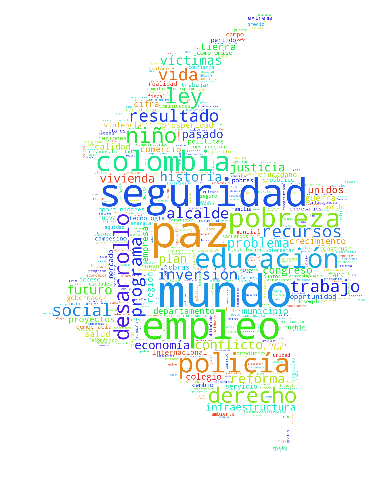

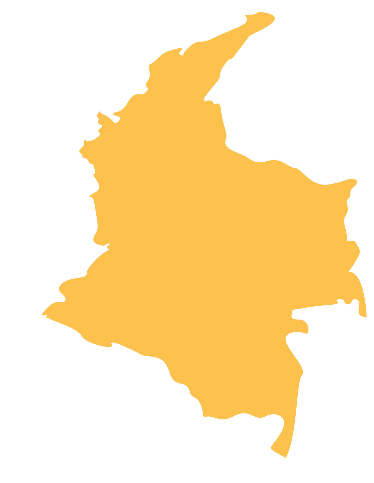

In [394]:
# Based on https://github.com/amueller/word_cloud/blob/master/examples/masked.py
# Word cloud requirements

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

d = path.dirname('/Users/Santiago/Dropbox/MPP/Q5/text_mining/final_project/wordcloud/tokens_of_interest_str.txt')

# Read the whole text
text = open(path.join(d, 'tokens_of_interest_str.txt')).read()

# Read the mask image
# taken from http://www.zonu.com/images/0X0/2011-08-16-14306/Colombia-outline-map.jpg
colombia_mask = np.array(Image.open(path.join(d, "colombia.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=colombia_mask)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file(path.join(d, "wordcloud.png"))

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(colombia_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

## Use of the words peace (paz) and terrorists (terroristas) in time.

In [109]:
speeches

,Year,Month,Day,Title,Location,URL,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,8,Saturday,Discurso del Presidente Juan Manuel Santos Cal...,N.A.,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,).- El siguiente es el discurso del presidente...,2010-08-07,el siguiente es el discurso del presidente ju...,"[el, siguiente, es, el, discurso, del, preside...","[siguiente, discurso, presidente, juan, manuel...","(siguiente, discurso, presidente, juan, manuel..."
1,2010,8,Sunday,Palabras del Presidente Santos durante la reun...,N.A.,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"“Quise venir de primero aquí a Guaranda, para ...",2010-08-08,quise venir de primero aquí a guaranda para da...,"[quise, venir, de, primero, aquí, a, guaranda,...","[quise, venir, primero, aquí, guaranda, darle,...","(quise, venir, primero, aquí, guaranda, darle,..."
2,2010,8,Wedsnesday,"Palabras del Presidente de la República, Juan ...",N.A.,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"'Cuida tus pensamientos, porque se convertirán...",2010-08-11,cuida tus pensamientos porque se convertirán e...,"[cuida, tus, pensamientos, porque, se, convert...","[cuida, pensamientos, convertirán, palabras, c...","(cuida, pensamientos, convertirán, palabras, c..."
3,2010,8,Friday,Palabras del Presidente Juan Manuel Santos Cal...,Horario de atención: lunes a vierne,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,,2010-08-13,,[],[],()
4,2010,8,Friday,Palabras del Presidente Juan Manuel Santos en ...,"Popayán, Cauca",http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"“Hoy es un día muy, muy importante. Para mí, p...",2010-08-13,hoy es un día muy muy importante para mí para ...,"[hoy, es, un, día, muy, muy, importante, para,...","[hoy, día, importante, gobierno, departamento,...","(hoy, día, importante, gobierno, departamento,..."
5,2010,8,Saturday,Palabras del Presidente Juan Manuel Santos en ...,Bucaramanga,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Muy buenos días a todos. Qué bueno estar aquí...,2010-08-14,muy buenos días a todos qué bueno estar aquí e...,"[muy, buenos, días, a, todos, qué, bueno, esta...","[buenos, días, bueno, aquí, bucaramanga, santa...","(buenos, días, bueno, aquí, bucaramanga, santa..."
6,2010,8,Wedsnesday,Palabras del Presidente Juan Manuel Santos en ...,Bogotá,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Yo tampoco –no se preocupen– voy a echar ning...,2010-08-18,yo tampoco no se preocupen voy a echar ningún ...,"[yo, tampoco, no, se, preocupen, voy, a, echar...","[tampoco, preocupen, voy, echar, ningún, discu...","(tampoco, preocupen, voy, echar, ningún, discu..."
7,2010,8,Wedsnesday,Palabras del Presidente Juan Manuel Santos en ...,San André,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Nuestros corazones están con ustedes; el nues...,2010-08-18,nuestros corazones están con ustedes el nuestr...,"[nuestros, corazones, están, con, ustedes, el,...","[corazones, ustedes, colombianos, pésame, titu...","(corazones, ustedes, colombianos, pésame, titu..."
8,2010,8,Thursday,"Palabras del Presidente de la República, Docto...",Bogotá,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,“Antes de comenzar quisiera hacer una breve de...,2010-08-19,antes de comenzar quisiera hacer una breve dec...,"[antes, de, comenzar, quisiera, hacer, una, br...","[comenzar, quisiera, hacer, breve, declaración...","(comenzar, quisiera, hacer, breve, declaración..."
9,2010,8,Friday,"Palabras del Presidente de la República, Docto...",Barranquilla,http://wsp.presidencia.gov.co/Prensa/2010/Agos...,"“¡Qué bueno venir a la costa Caribe, a esta qu...",2010-08-20,qué bueno venir a la costa caribe a esta queri...,"[qué, bueno, venir, a, la, costa, caribe, a, e...","[bueno, venir, costa, caribe, querida, barranq...","(bueno, venir, costa, caribe, querida, barranq..."


In [205]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [206]:
speeches['paz'] = [col_counter(speeches['no_stopwords'][i], 'paz') for i in range(len(speeches['no_stopwords']))]

In [214]:
speeches['terroristas'] = [col_counter(speeches['no_stopwords'][i], 'terroristas') for i in range(len(speeches['no_stopwords']))]

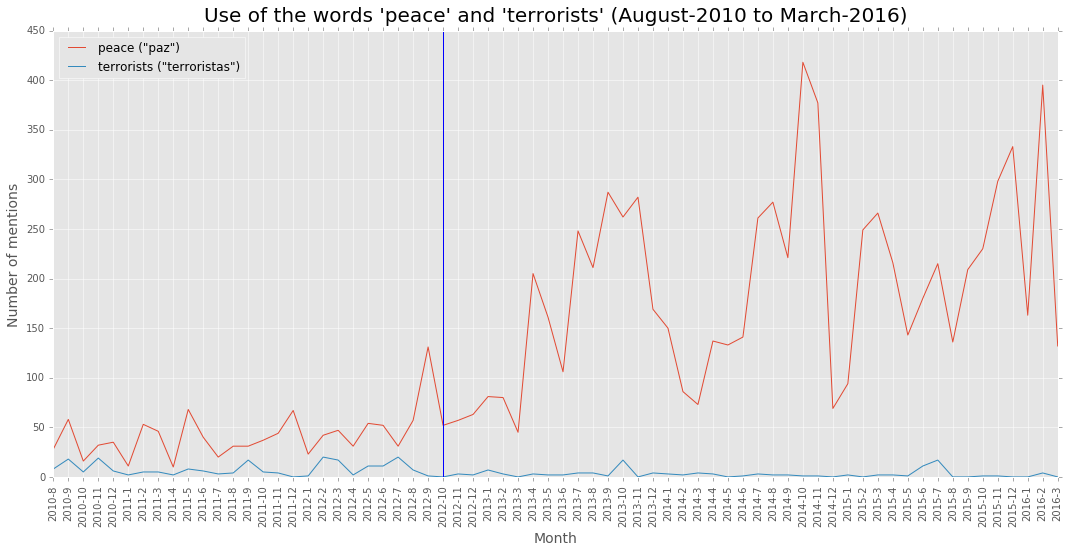

In [225]:
paz_by_month = by_year_month['paz'].agg('sum')
terroristas_by_month = by_year_month['terroristas'].agg('sum')
paz_by_month.plot()
terroristas_by_month.plot()
plt.title("Use of the words 'peace' and 'terrorists' (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['peace ("paz")', 'terrorists ("terroristas")'], loc='upper left');
plt.savefig('images/paz_terroristas_month.png')

## Use of words for public policy areas.

In [281]:
speeches['educación'] = [col_counter(speeches['no_stopwords'][i], 'educación') for i in range(len(speeches['no_stopwords']))]

In [261]:
speeches['pobreza'] = [col_counter(speeches['no_stopwords'][i], 'pobreza') for i in range(len(speeches['no_stopwords']))]

In [262]:
speeches['campo'] = [col_counter(speeches['no_stopwords'][i], 'campo') for i in range(len(speeches['no_stopwords']))]

In [263]:
speeches['emprendimiento'] = [col_counter(speeches['no_stopwords'][i], 'emprendimiento') for i in range(len(speeches['no_stopwords']))]

In [264]:
speeches['formalización'] = [col_counter(speeches['no_stopwords'][i], 'formalización') for i in range(len(speeches['no_stopwords']))]

In [265]:
speeches['innovación'] = [col_counter(speeches['no_stopwords'][i], 'innovación') for i in range(len(speeches['no_stopwords']))]

In [266]:
speeches['industria'] = [col_counter(speeches['no_stopwords'][i], 'industria') for i in range(len(speeches['no_stopwords']))]

In [267]:
speeches['comercio'] = [col_counter(speeches['no_stopwords'][i], 'comercio') for i in range(len(speeches['no_stopwords']))]

In [268]:
speeches['servicios'] = [col_counter(speeches['no_stopwords'][i], 'servicios') for i in range(len(speeches['no_stopwords']))]

In [283]:
speeches['empleo'] = [col_counter(speeches['no_stopwords'][i], 'empleo') for i in range(len(speeches['no_stopwords']))]

In [269]:
speeches['defensa'] = [col_counter(speeches['no_stopwords'][i], 'defensa') for i in range(len(speeches['no_stopwords']))]

In [270]:
speeches['social'] = [col_counter(speeches['no_stopwords'][i], 'social') for i in range(len(speeches['no_stopwords']))]

In [271]:
speeches['salud'] = [col_counter(speeches['no_stopwords'][i], 'salud') for i in range(len(speeches['no_stopwords']))]

In [272]:
speeches['infancia'] = [col_counter(speeches['no_stopwords'][i], 'infancia') for i in range(len(speeches['no_stopwords']))]

In [274]:
speeches['infraestructura'] = [col_counter(speeches['no_stopwords'][i], 'infraestructura') for i in range(len(speeches['no_stopwords']))]

In [273]:
speeches['productividad'] = [col_counter(speeches['no_stopwords'][i], 'productividad') for i in range(len(speeches['no_stopwords']))]

In [275]:
speeches['competitividad'] = [col_counter(speeches['no_stopwords'][i], 'competitividad') for i in range(len(speeches['no_stopwords']))]

In [285]:
speeches['vivienda'] = [col_counter(speeches['no_stopwords'][i], 'vivienda') for i in range(len(speeches['no_stopwords']))]

In [276]:
speeches['ciencia'] = [col_counter(speeches['no_stopwords'][i], 'ciencia') for i in range(len(speeches['no_stopwords']))]

In [277]:
speeches['tecnología'] = [col_counter(speeches['no_stopwords'][i], 'tecnología') for i in range(len(speeches['no_stopwords']))]

In [278]:
speeches['transporte'] = [col_counter(speeches['no_stopwords'][i], 'transporte') for i in range(len(speeches['no_stopwords']))]

In [287]:
speeches['deporte'] = [col_counter(speeches['no_stopwords'][i], 'deporte') for i in range(len(speeches['no_stopwords']))]

In [279]:
speeches['minería'] = [col_counter(speeches['no_stopwords'][i], 'minería') for i in range(len(speeches['no_stopwords']))]

In [290]:
educacion_by_month = by_year_month['educación'].agg('sum')
pobreza_by_month = by_year_month['pobreza'].agg('sum')
campo_by_month = by_year_month['campo'].agg('sum')
emprendimiento_by_month = by_year_month['emprendimiento'].agg('sum')
formalización_by_month = by_year_month['formalización'].agg('sum')
innovación_by_month = by_year_month['innovación'].agg('sum')
industria_by_month = by_year_month['industria'].agg('sum')
comercio_by_month = by_year_month['comercio'].agg('sum')
servicios_by_month = by_year_month['servicios'].agg('sum')
empleo_by_month = by_year_month['empleo'].agg('sum')
defensa_by_month = by_year_month['defensa'].agg('sum')
social_by_month = by_year_month['social'].agg('sum')
salud_by_month = by_year_month['salud'].agg('sum')
infancia_by_month = by_year_month['infancia'].agg('sum')
infraestructura_by_month = by_year_month['infraestructura'].agg('sum')
productividad_by_month = by_year_month['productividad'].agg('sum')
competitividad_by_month = by_year_month['competitividad'].agg('sum')
vivienda_by_month = by_year_month['vivienda'].agg('sum')
ciencia_by_month = by_year_month['ciencia'].agg('sum')
tecnología_by_month = by_year_month['tecnología'].agg('sum')
transporte_by_month = by_year_month['transporte'].agg('sum')
deporte_by_month = by_year_month['deporte'].agg('sum')
minería_by_month = by_year_month['minería'].agg('sum')

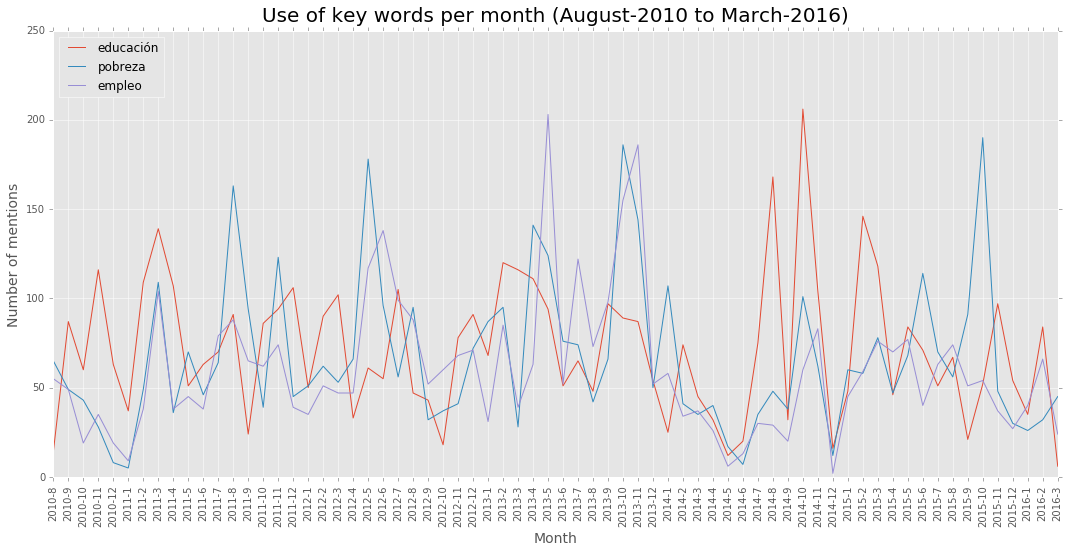

In [305]:
educacion_by_month.plot()
pobreza_by_month.plot()
empleo_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','pobreza','empleo'], loc='upper left');
plt.savefig('images/key_words1_month.png')

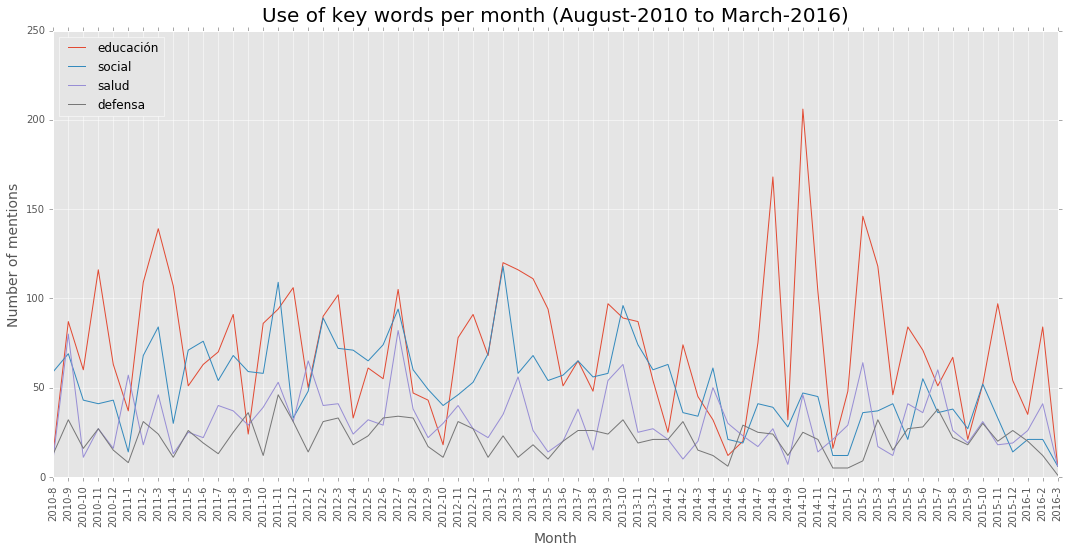

In [307]:
educacion_by_month.plot()
social_by_month.plot()
salud_by_month.plot()
defensa_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','social','salud','defensa'], loc='upper left');
plt.savefig('images/key_words2_month.png')

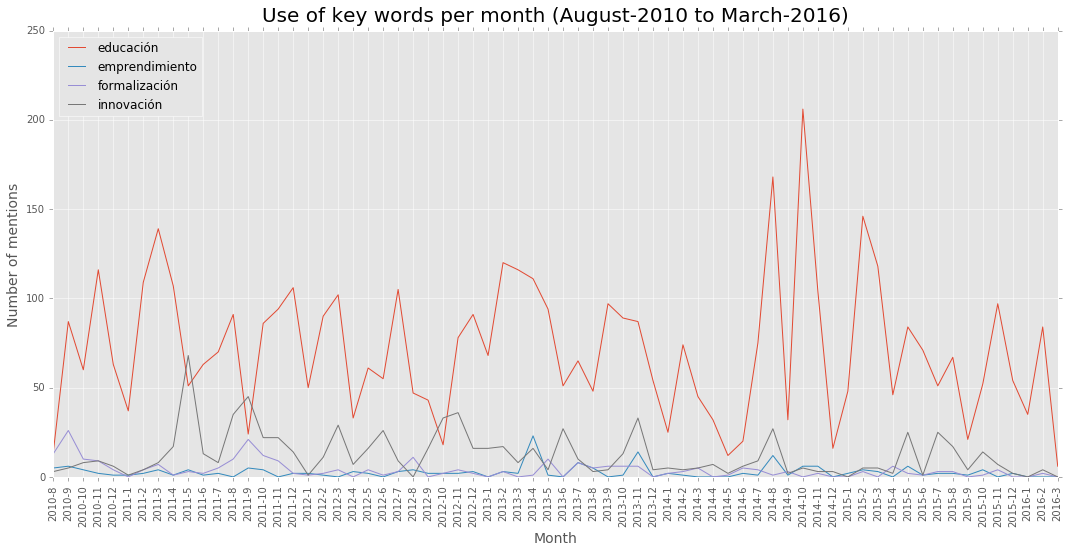

In [308]:
educacion_by_month.plot()
emprendimiento_by_month.plot()
formalización_by_month.plot()
innovación_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','emprendimiento','formalización','innovación'], loc='upper left');
plt.savefig('images/key_words3_month.png')

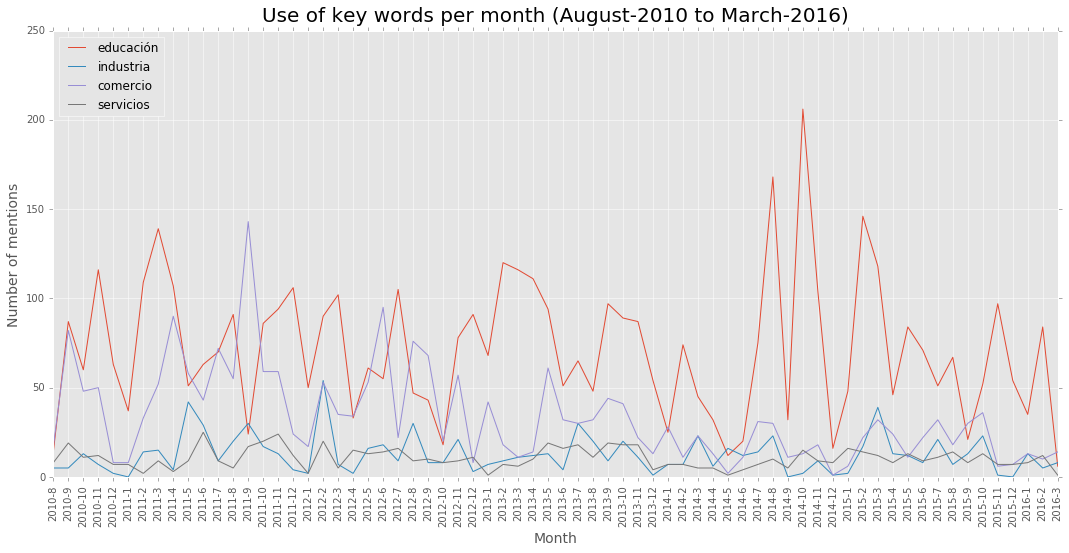

In [309]:
educacion_by_month.plot()
industria_by_month.plot()
comercio_by_month.plot()
servicios_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','industria','comercio','servicios'], loc='upper left');
plt.savefig('images/key_words4_month.png')

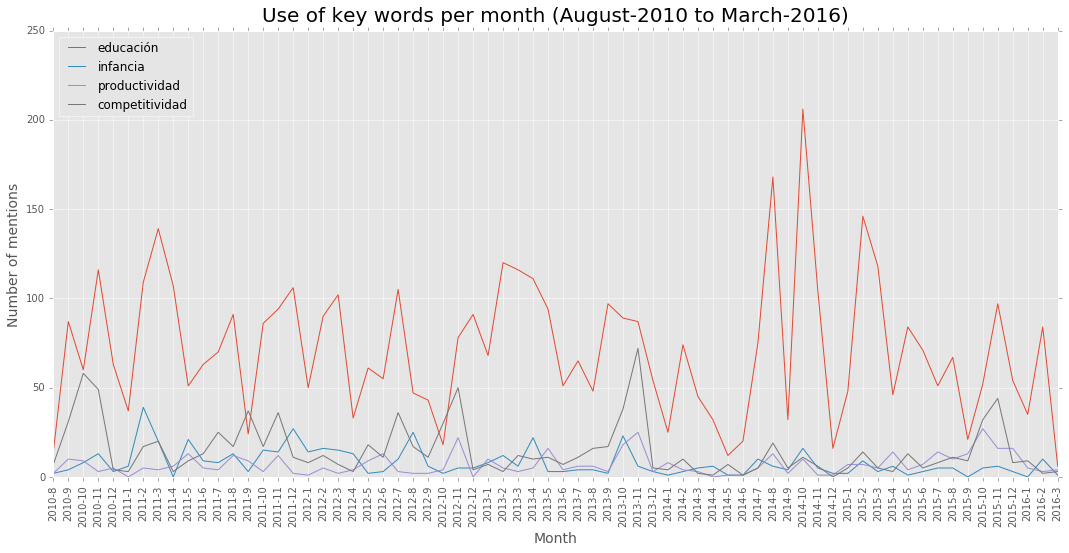

In [310]:
educacion_by_month.plot()
infancia_by_month.plot()
productividad_by_month.plot()
competitividad_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','infancia','productividad','competitividad'], loc='upper left');
plt.savefig('images/key_words5_month.png')

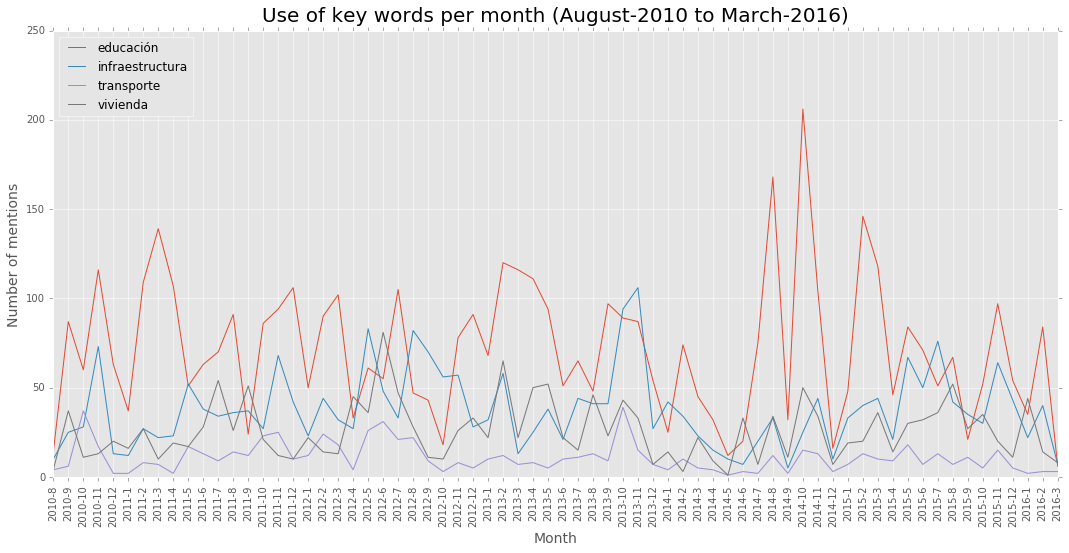

In [311]:
educacion_by_month.plot()
infraestructura_by_month.plot()
transporte_by_month.plot()
vivienda_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','infraestructura','transporte','vivienda'], loc='upper left');
plt.savefig('images/key_words6_month.png')

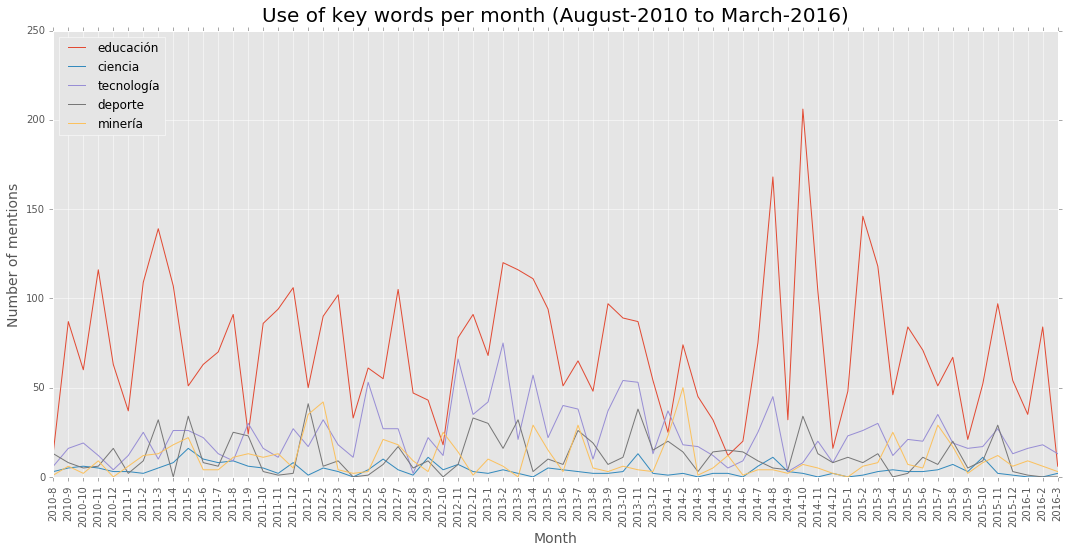

In [312]:
educacion_by_month.plot()
ciencia_by_month.plot()
tecnología_by_month.plot()
deporte_by_month.plot()
minería_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['educación','ciencia','tecnología','deporte','minería'], loc='upper left');
plt.savefig('images/key_words7_month.png')

In [342]:
totals_by_topic = speeches.ix[:,15:].sum()
totals_by_topic = totals_by_topic.sort_values(ascending=False)
totals_by_topic

educación          4879
pobreza            4544
empleo             4089
social             3469
infraestructura    2572
comercio           2274
salud              2151
vivienda           1765
campo              1711
tecnología         1581
defensa            1460
competitividad     1015
industria           856
innovación          832
deporte             814
transporte          739
servicios           714
rural               712
minería             699
infancia            536
productividad       476
ciencia             274
formalización       268
emprendimiento      183
dtype: int64

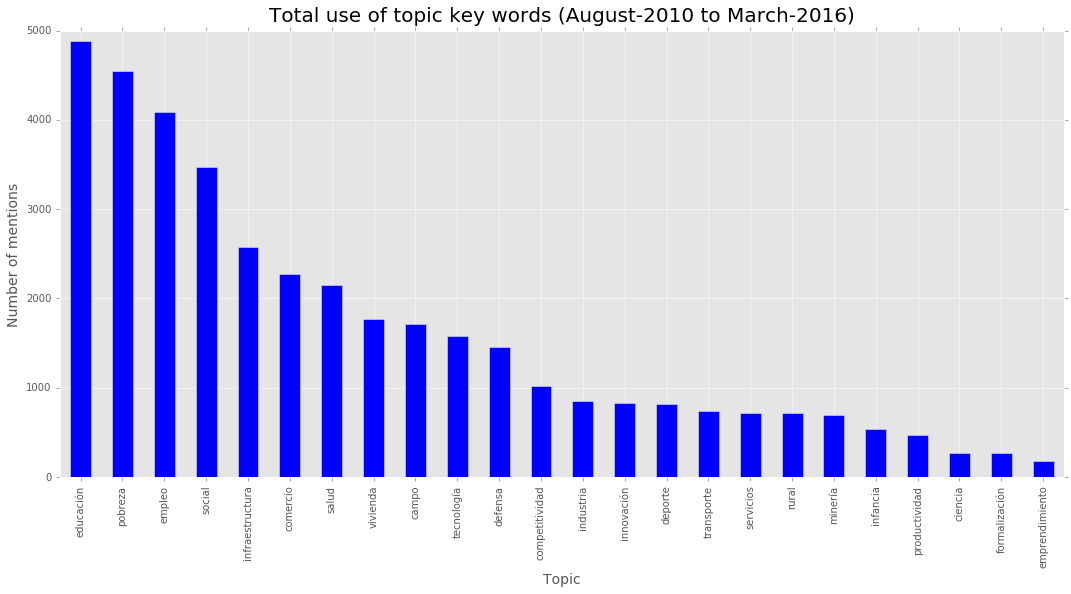

In [386]:
totals_by_topic.plot(kind='bar')

plt.title("Total use of topic key words (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Topic", fontdict={'fontsize': 14})
plt.savefig('images/topics_total.png')

## Collocations

In [356]:
all_speeches_Text = nltk.Text(all_tokens)
all_speeches_Text

<Text: siguiente discurso presidente juan manuel santos calderón asumir...>

In [366]:
all_speeches_Text.collocations(num = 30)

américa latina; cada vez; muchas gracias; fuerzas armadas; pobreza
extrema; naciones unidas; año pasado; billones pesos; mundo entero;
millones pesos; fuerza pública; mil millones; tan importante; primera
vez; tal vez; derechos humanos; fuerza aérea; fuerzas militares;
cierta forma; libre comercio; muchas veces; medio ambiente; niños
niñas; conflicto armado; cambio climático; pueblo colombiano; ministro
defensa; largo plazo; puerto destino; ministro hacienda


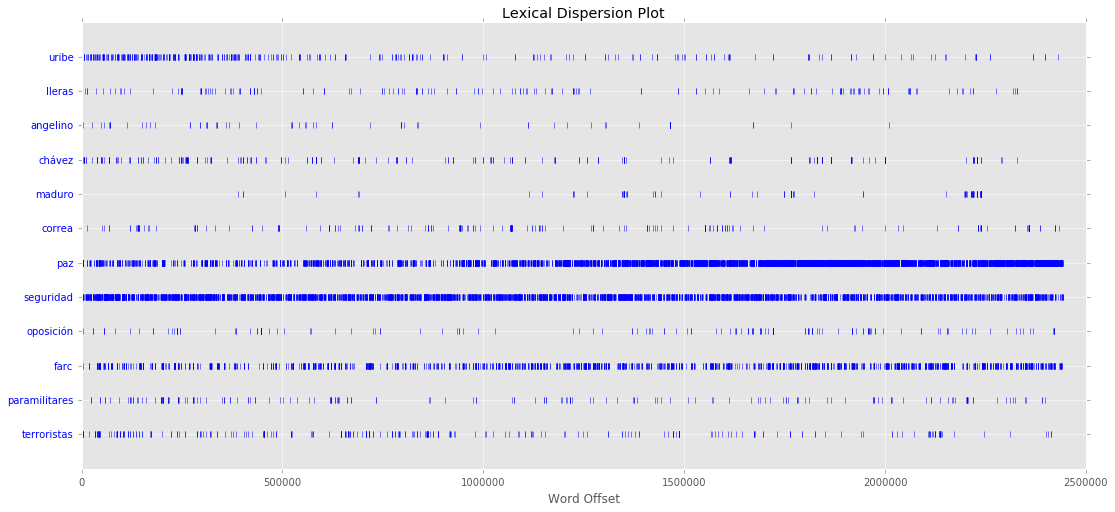

In [381]:
all_speeches_Text.dispersion_plot(['uribe', 'lleras', 'angelino', 'chávez', 'maduro', 'correa',\
                                   'paz', 'seguridad', 'oposición', 'farc', 'paramilitares', 'terroristas'])

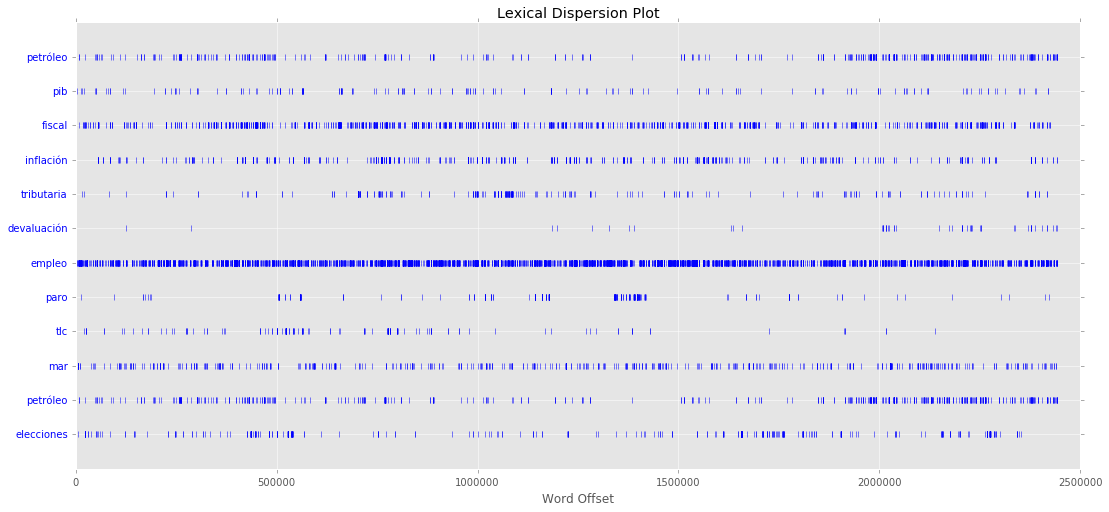

In [382]:
all_speeches_Text.dispersion_plot(['petróleo', 'pib', 'fiscal', 'inflación', 'tributaria', 'devaluación',\
                                  'empleo', 'paro', 'tlc', 'mar', 'petróleo', 'elecciones'])

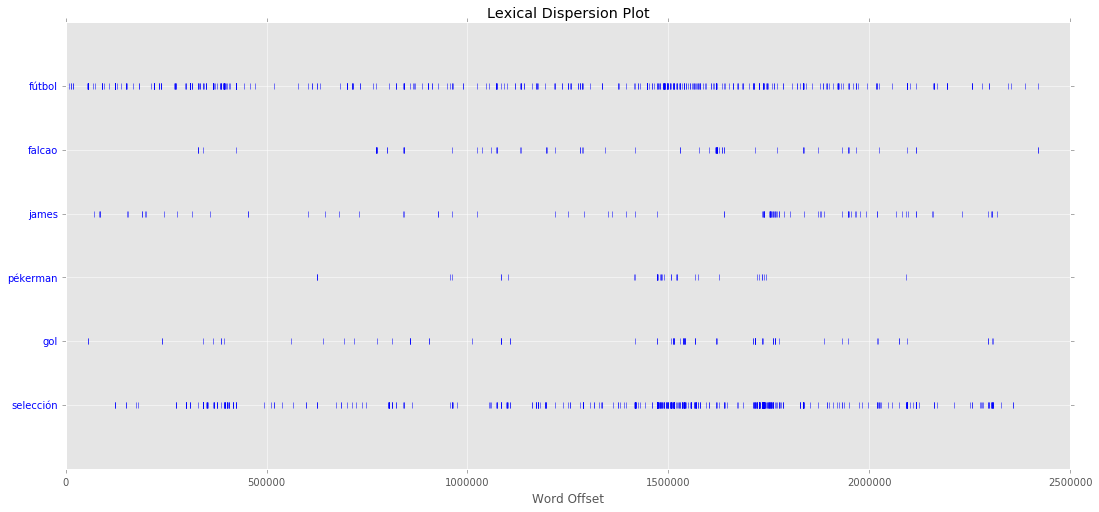

In [385]:
all_speeches_Text.dispersion_plot(['fútbol', 'falcao', 'james', 'pékerman', 'gol', 'selección'])